In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import root_mean_squared_error

In [9]:
def rmse(y_true, y_pred):
    mean_squared_error = np.mean((y_true - y_pred) ** 2)  # Среднее значение квадратов ошибок
    return np.sqrt(mean_squared_error)

In [11]:
data = pd.read_feather("wide_data.feather")

X = data.loc[:, ~data.columns.isin(["HL_1", "HL_2", "HL_3", "HL_4", "HL_5", "HL_6", "id"])]
y = data.loc[:, "HL_1":"HL_6"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
mor_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=500, random_state=42)).fit(X_train, y_train)

y_pred = mor_model.predict(X_test)
print(f"Root Mean Squared Error: {rmse(y_test, y_pred)}")

Root Mean Squared Error: 2.1941610460671366


Root Mean Squared Error: 2.1939639438160112 для n_est=1000
Root Mean Squared Error: 2.2284464935263317 для n_est=100
Root Mean Squared Error: 2.1941610460671366 для n_est=500

In [43]:
chain_model = RegressorChain(RandomForestRegressor(n_estimators=1000, random_state=42)).fit(X_train, y_train)

y_pred = chain_model.predict(X_test)
print(f"Root Mean Squared Error: {rmse(y_test, y_pred)}")

Root Mean Squared Error: 2.225661252258286


In [ ]:
lr_model1 = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
lr_model2 = RegressorChain(LinearRegression()).fit(X_train, y_train)

y_pred1 = lr_model1.predict(X_test)
print(f"Root Mean Squared Error: {rmse(y_test, y_pred1)}")

y_pred2 = lr_model2.predict(X_test)
print(f"Root Mean Squared Error: {rmse(y_test, y_pred2)}")

Root Mean Squared Error: 2.3543859767245854
Root Mean Squared Error: 2.354385976724586


In [46]:
from sklearn.svm import SVR

svr_model1 = RegressorChain(SVR(kernel='linear')).fit(X_train, y_train)
svr_model2 = RegressorChain(SVR(kernel='poly')).fit(X_train, y_train)
svr_model3 = RegressorChain(SVR(kernel='rbf')).fit(X_train, y_train)

y_pred1 = svr_model1.predict(X_test)
y_pred2 = svr_model2.predict(X_test)
y_pred3 = svr_model3.predict(X_test)

print(f"Root Mean Squared Error: {rmse(y_test, y_pred1)}")
print(f"Root Mean Squared Error: {rmse(y_test, y_pred2)}")
print(f"Root Mean Squared Error: {rmse(y_test, y_pred3)}")

Root Mean Squared Error: 2.4056842024969742
Root Mean Squared Error: 2.2901924434243894
Root Mean Squared Error: 2.2700014717772112


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = RegressorChain(KNeighborsRegressor(n_neighbors=5)).fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(f"Root Mean Squared Error: {rmse(y_test, y_pred)}")

Root Mean Squared Error: 2.420055095791554


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
tf_model = Sequential([
    Dense(128, input_dim=55, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(6)
])

tf_model.compile(optimizer='adam', loss='mse')
    
history = tf_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

y_pred = tf_model.predict(X_test)
print(f"Root Mean Squared Error: {rmse(y_test, y_pred)}")

Root Mean Squared Error: 2.423056427748568


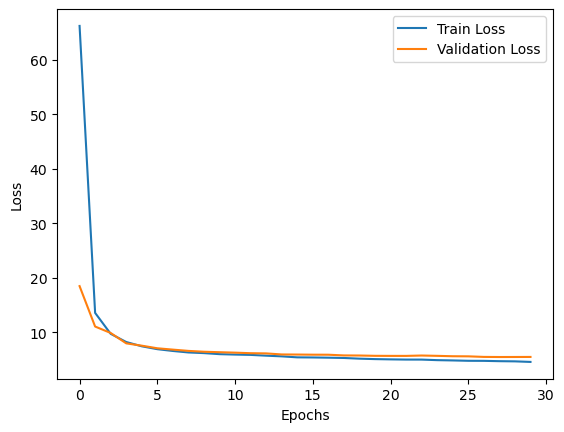

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()